#  **Evaluating Machine Learning Models for Customer Churn Prediction in Telecom**

##                                  *Feature Analysis on dataset*

##   Evaluates the efficacy of multiple machine learning models in predicting customer churn using a dataset consisting of 900,000 customer data records (CDRs) from three months of demographic data collected by a telecom company in 2016.

### [Dataset ]     ( https://gitee.com/jian123654/churn_prediction_dataset) *italicized text*

#  Read Dataset from Google colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load Dataset


In [8]:
import pandas as pd

# Read dataset
dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/Main Dataset.csv', encoding='latin1')


print("Dataset columns:")
print(dataset.columns)

print("First five rows:")
print(dataset.head().to_string(index=False))


Dataset columns:
Index(['MONTH_ID', 'USER_ID', 'INNET_MONTH', 'IS_AGREE', 'AGREE_EXP_DATE',
       'CREDIT_LEVEL', 'VIP_LVL', 'ACCT_FEE', 'CALL_DURA',
       'NO_ROAM_LOCAL_CALL_DURA', 'NO_ROAM_GN_LONG_CALL_DURA',
       'GN_ROAM_CALL_DURA', 'CDR_NUM', 'NO_ROAM_CDR_NUM',
       'NO_ROAM_LOCAL_CDR_NUM', 'NO_ROAM_GN_LONG_CDR_NUM', 'GN_ROAM_CDR_NUM',
       'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX', 'GN_ROAM_FLUX',
       'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING', 'CALLING_RING',
       'CALLED_RING', 'CUST_SEX', 'CERT_AGE', 'CONSTELLATION_DESC',
       'MANU_NAME', 'MODEL_NAME', 'OS_DESC', 'TERM_TYPE', 'IS_LOST'],
      dtype='object')
First five rows:
 MONTH_ID           USER_ID  INNET_MONTH  IS_AGREE  AGREE_EXP_DATE  CREDIT_LEVEL  VIP_LVL  ACCT_FEE  CALL_DURA  NO_ROAM_LOCAL_CALL_DURA  NO_ROAM_GN_LONG_CALL_DURA  GN_ROAM_CALL_DURA  CDR_NUM  NO_ROAM_CDR_NUM  NO_ROAM_LOCAL_CDR_NUM  NO_ROAM_GN_LONG_CDR_NUM  GN_ROAM_CDR_NUM  P2P_SMS_CNT_UP  TOTAL_FLUX  LOCAL_FLUX  GN_ROAM_FL

## 2. Null Values

In [10]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/Main Dataset.csv', encoding='latin1')

null_counts = dataset.isnull().sum()

null_counts_df = pd.DataFrame(null_counts, columns=["Missing Values"])
null_counts_df = null_counts_df[null_counts_df["Missing Values"] > 0]
print("Number of missing values in each column:")
print(null_counts_df)

print("\nRows with missing values:")
print(dataset[dataset.isnull().any(axis=1)].head())


Number of missing values in each column:
                    Missing Values
AGREE_EXP_DATE              440665
VIP_LVL                     311283
CUST_SEX                     34287
CERT_AGE                     34971
CONSTELLATION_DESC           34971
MANU_NAME                        2
OS_DESC                      38194
IS_LOST                     599691

Rows with missing values:
   MONTH_ID            USER_ID  INNET_MONTH  IS_AGREE  AGREE_EXP_DATE  \
0    201601  U3115092040504266           62         1        201609.0   
1    201601  U3115090138635105            5         1        201609.0   
2    201601  U3115062769878916          171         0             NaN   
3    201601  U3115061733263650            8         1        201606.0   
4    201601  U3115060569699130            8         0             NaN   

   CREDIT_LEVEL  VIP_LVL  ACCT_FEE  CALL_DURA  NO_ROAM_LOCAL_CALL_DURA  ...  \
0            65     99.0     84.95      36891                     2699  ...   
1            66     

## Explanation:
####To give a clear overview of where missing values are located in your dataset, to allow decide how to handle them *italicized text*

## 3. Print column

In [11]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/Main Dataset.csv', encoding='latin1')


column_names = pd.DataFrame(dataset.columns, columns=['Column Names'])


column_names.to_excel('column_names.xlsx', index=False)

# Prt the column names
print(column_names)


                 Column Names
0                    MONTH_ID
1                     USER_ID
2                 INNET_MONTH
3                    IS_AGREE
4              AGREE_EXP_DATE
5                CREDIT_LEVEL
6                     VIP_LVL
7                    ACCT_FEE
8                   CALL_DURA
9     NO_ROAM_LOCAL_CALL_DURA
10  NO_ROAM_GN_LONG_CALL_DURA
11          GN_ROAM_CALL_DURA
12                    CDR_NUM
13            NO_ROAM_CDR_NUM
14      NO_ROAM_LOCAL_CDR_NUM
15    NO_ROAM_GN_LONG_CDR_NUM
16            GN_ROAM_CDR_NUM
17             P2P_SMS_CNT_UP
18                 TOTAL_FLUX
19                 LOCAL_FLUX
20               GN_ROAM_FLUX
21                  CALL_DAYS
22               CALLING_DAYS
23                CALLED_DAYS
24                  CALL_RING
25               CALLING_RING
26                CALLED_RING
27                   CUST_SEX
28                   CERT_AGE
29         CONSTELLATION_DESC
30                  MANU_NAME
31                 MODEL_NAME
32        

## 4.  Bar Chart Churn & Non churn customers

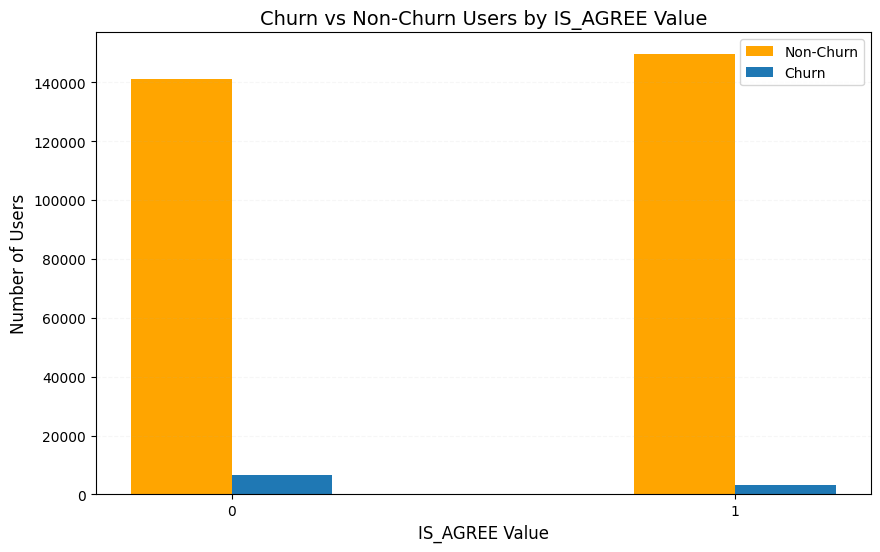

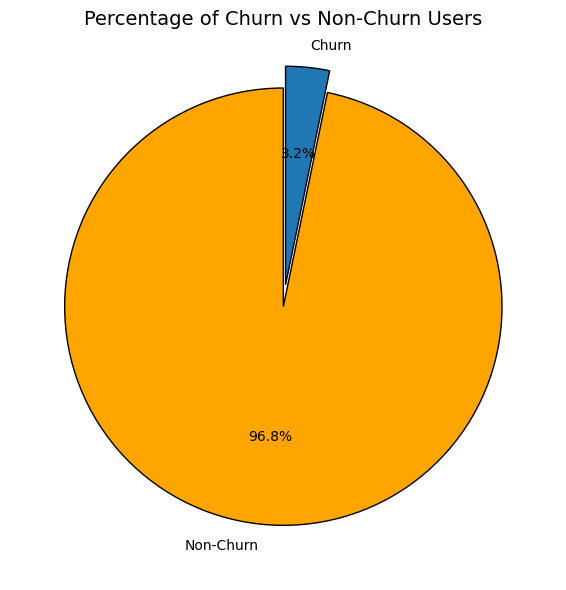

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/Main Dataset.csv', encoding='latin1')

# Group data by IS_AGREE & IS_LOST (churn vs. non-churn)
is_agree_churn_stats = dataset.groupby('IS_AGREE')['IS_LOST'].value_counts().unstack().fillna(0)
is_agree_churn_stats.columns = ['Non-Churn', 'Churn']

#  Calculate total churned & non-churned users for percentages
total_non_churn = is_agree_churn_stats['Non-Churn'].sum()
total_churn = is_agree_churn_stats['Churn'].sum()
total_users = total_non_churn + total_churn
percent_non_churn = (total_non_churn / total_users) * 100
percent_churn = (total_churn / total_users) * 100

#  Define positions and reduce bar width for thinner bars
x = np.arange(len(is_agree_churn_stats))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Non-Churn users
bars1 = ax.bar(x - width/2, is_agree_churn_stats['Non-Churn'], width, label='Non-Churn', color='#FFA500')

# Bars for Churn users
bars2 = ax.bar(x + width/2, is_agree_churn_stats['Churn'], width, label='Churn', color='#1F78B4')

# Add labels, title, and legend
ax.set_xlabel('IS_AGREE Value', fontsize=12)
ax.set_ylabel('Number of Users', fontsize=12)
ax.set_title('Churn vs Non-Churn Users by IS_AGREE Value', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(is_agree_churn_stats.index)
ax.legend()

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.1)

# Add pie chart below the bar chart
fig, pie_ax = plt.subplots(figsize=(6, 6))

labels = ['Non-Churn', 'Churn']
sizes = [total_non_churn, total_churn]
colors = ['#FFA500', '#1F78B4']
explode = (0, 0.1)  # Separate the slice for churn users


pie_ax.pie(
    sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
    wedgeprops={'edgecolor': 'black'},
    textprops={'color': 'Black'}
)
pie_ax.set_title('Percentage of Churn vs Non-Churn Users', fontsize=14)

# Display the pie chart
plt.tight_layout()
plt.show()


## Explanation:
#### The visualizes the churn and non-churn users by grouping data based on agreement status and churn status, displaying a bar chart and a pie chart to compare the proportions.

## 5. Histogram of Call duration in 3 Months

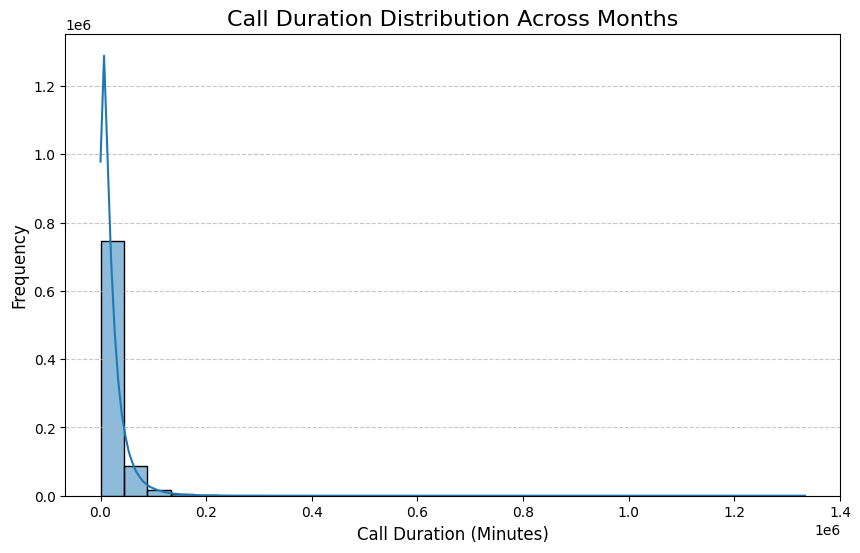

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv', encoding='latin1')

#  call duration data from all months into a single column
monthly_call_data = dataset[['CALL_DURA_201601', 'CALL_DURA_201602', 'CALL_DURA_201603']].melt(
    var_name='Month', value_name='Duration of Calls')

# Plot histogram to show call duration
plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_call_data, x='Duration of Calls', bins=30, kde=True, color='#1F78B4')
plt.title('Call Duration Distribution Across Months', fontsize=16)
plt.xlabel('Call Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Explanation:
#### To combines call duration data across multiple months, creates a histogram to visualize the distribution of call durations, and adds a KDE curve for better understanding of the data spread.

## 6.  Call duration Trend Analysis: Churned vs Non-Churned Users

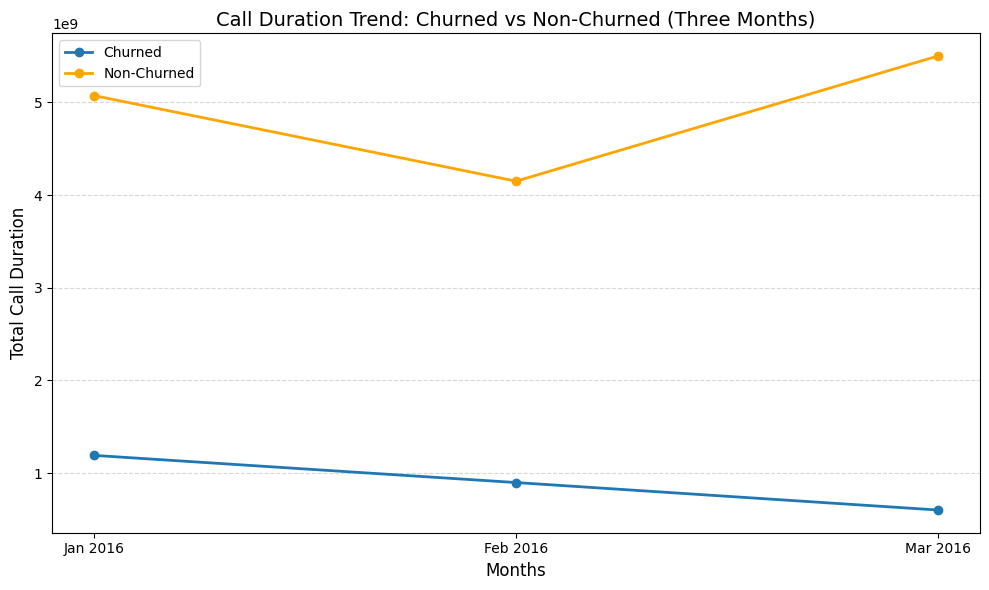

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv')


call_duration_columns = ['CALL_DURA_201601', 'CALL_DURA_201602', 'CALL_DURA_201603']

# Split features and target variable
X_features = dataset.drop(columns=['IS_LOST', 'USER_ID'])
y_target = dataset['IS_LOST']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

#  SMOTE to balance the training data
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Create a balanced dataset for analysis
balanced_data = X_train_balanced.copy()
balanced_data['IS_LOST'] = y_train_balanced

# Separate churned & non-churned customers
non_churned_customers = balanced_data[balanced_data['IS_LOST'] == 0]  # Non-Churned
churned_customers = balanced_data[balanced_data['IS_LOST'] == 1]  # Churned


churned_totals = churned_customers[call_duration_columns].sum()
non_churned_totals = non_churned_customers[call_duration_columns].sum()

#  the line chart
plt.figure(figsize=(10, 6))
plt.plot(call_duration_columns, churned_totals, marker='o', label='Churned', color='#1F78B4', linewidth=2)
plt.plot(call_duration_columns, non_churned_totals, marker='o', label='Non-Churned', color='#FFA500', linewidth=2)

# Customize chart
plt.title('Call Duration Trend: Churned vs Non-Churned (Three Months)', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Total Call Duration', fontsize=12)
plt.xticks(call_duration_columns, ['Jan 2016', 'Feb 2016', 'Mar 2016'])  # Customize x-axis labels
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Explanation:
#### To analyze the total call durations over three months for churned and non-churned customers, a line chart is used to highlight differences in call activity between the two groups after balancing the dataset using SMOTE

## 7. P2P SMS Trend Analysis: Churned vs Non-Churned Users

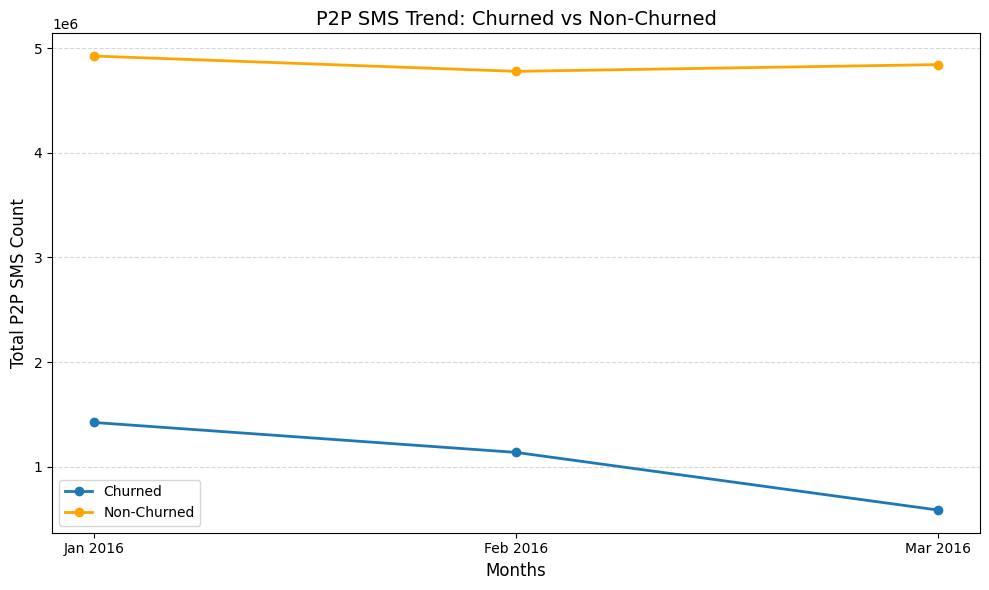

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load data
data_file = '/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv'
main_df = pd.read_csv(data_file)

# Columns for P2P SMS counts
sms_columns = ['P2P_SMS_CNT_UP_201601', 'P2P_SMS_CNT_UP_201602', 'P2P_SMS_CNT_UP_201603']

# Features and target split
features = main_df.drop(columns=['IS_LOST', 'USER_ID'])
target = main_df['IS_LOST']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Balance training data
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Combine balanced data
balanced_df = X_train_res.copy()
balanced_df['IS_LOST'] = y_train_res

# Separate groups
non_churn_df = balanced_df[balanced_df['IS_LOST'] == 0]
churn_df = balanced_df[balanced_df['IS_LOST'] == 1]

# Calculate totals for each group
churn_totals = churn_df[sms_columns].sum()
non_churn_totals = non_churn_df[sms_columns].sum()

# Plot trends
plt.figure(figsize=(10, 6))
plt.plot(sms_columns, churn_totals, marker='o', label='Churned', color='#1F78B4', linewidth=2)
plt.plot(sms_columns, non_churn_totals, marker='o', label='Non-Churned', color='#FFA500', linewidth=2)

# Customize chart
plt.title('P2P SMS Trend: Churned vs Non-Churned', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Total P2P SMS Count', fontsize=12)
plt.xticks(sms_columns, ['Jan 2016', 'Feb 2016', 'Mar 2016'])  # X-axis labels
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 ## Explanation:
####   Analyzes the P2P SMS behavior of churned and non-churned users over three months (January, February, and March 2016). The script uses the SMOTE  technique to balance the dataset and visualizes trends to identify patterns leading to churn.

## 8. Analyzing Data Usage Trends for Churned and Non-Churned Customers

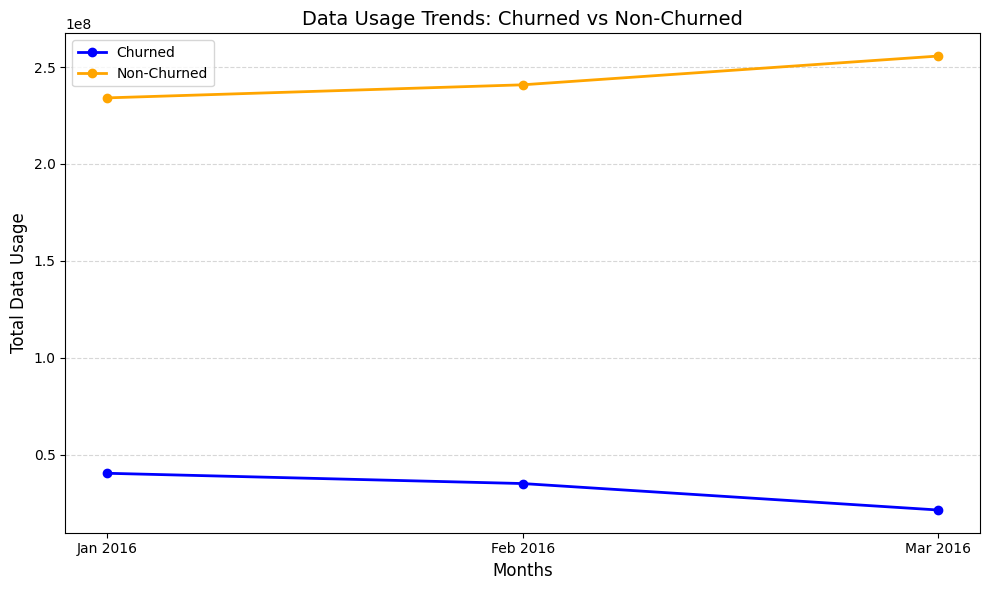

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
data_file = '/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv'
dataset = pd.read_csv(data_file)

# Target columns for analysis
flux_columns = ['TOTAL_FLUX_201601', 'TOTAL_FLUX_201602', 'TOTAL_FLUX_201603']

# Split data
X_data = dataset.drop(columns=['IS_LOST', 'USER_ID'])
y_target = dataset['IS_LOST']

# Split training and test sets
train_data, test_data, train_target, test_target = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

# Balance data using SMOTE
balance = SMOTE(sampling_strategy=0.4, random_state=42)
X_train_bal, y_train_bal = balance.fit_resample(train_data, train_target)

# Prepare data for analysis
balanced_dataset = X_train_bal.copy()
balanced_dataset['IS_LOST'] = y_train_bal

# Separate groups
lost_customers = balanced_dataset[balanced_dataset['IS_LOST'] == 1]
retained_customers = balanced_dataset[balanced_dataset['IS_LOST'] == 0]

# Sum data for each group
lost_totals = lost_customers[flux_columns].sum()
retained_totals = retained_customers[flux_columns].sum()

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(flux_columns, lost_totals, marker='o', label='Churned', color='blue', linewidth=2)
plt.plot(flux_columns, retained_totals, marker='o', label='Non-Churned', color='orange', linewidth=2)

# Customize the chart
plt.title('Data Usage Trends: Churned vs Non-Churned', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Total Data Usage', fontsize=12)
plt.xticks(flux_columns, ['Jan 2016', 'Feb 2016', 'Mar 2016'], rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Explanation:
#### This analysis investigates the total data usage (`TOTAL_FLUX`) trends over three months (January to March 2016) for churned and non-churned customers. The dataset is balanced using  SMOTE  to address any imbalance in the `IS_LOST` column (indicating churn). A line chart visually compares the behavior of both groups, revealing how data usage changes over time.

## 9. Churn customers by gender

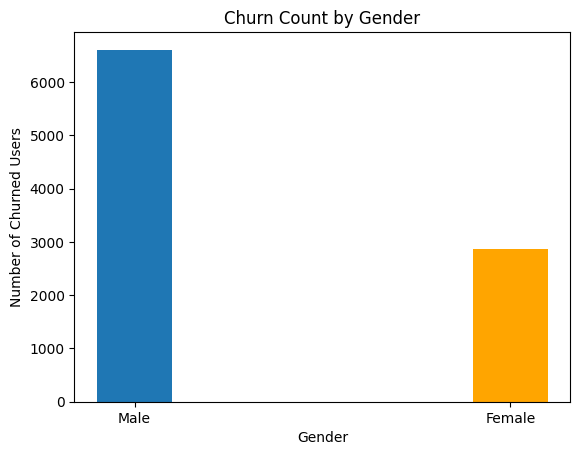

In [24]:
import matplotlib.pyplot as plt

# Gender churn data from previous calculation
churn_data = {'Gender': ['Male', 'Female'], 'Churn Count': [6610, 2868]}
colors = ['#1f77b4', '#FFA500']  # Blue for male, orange for female

# Creating the bar chart
plt.bar(churn_data['Gender'], churn_data['Churn Count'], color=colors, width=0.2)  # Adjust width
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Users')
plt.show()


  ## Explanation:
#### The code creates a bar chart to visualize the churned users based on gender. It reveals that males have a higher churn count compared to females.

## 10. Number of Churn by Credit Level

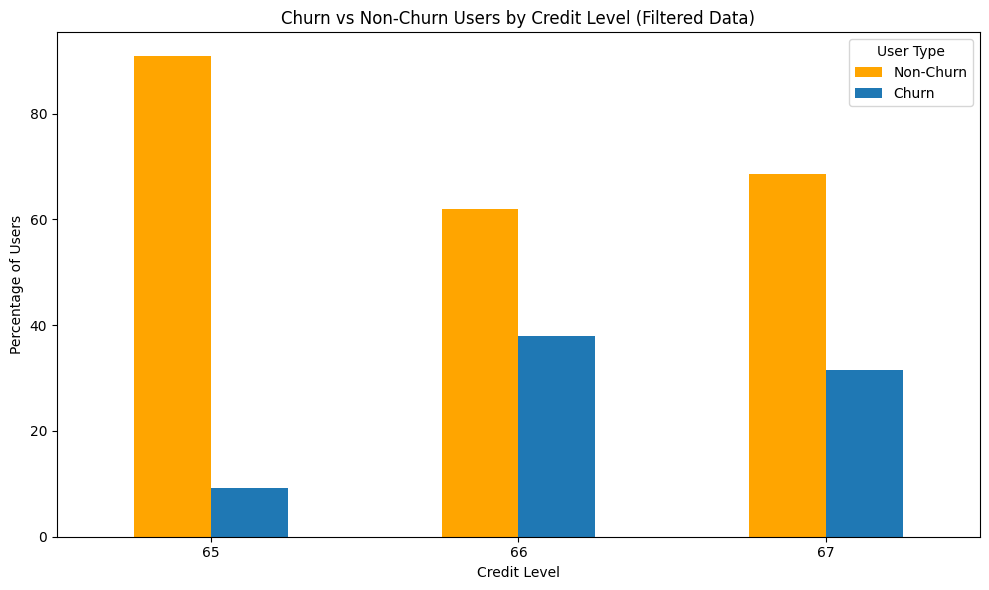

Credit Level Distribution by Churn Status (Filtered Data):
IS_LOST           0      1
CREDIT_LEVEL              
65            68793   6939
66            75528  46203
67            76151  35007


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V27.1.csv')

# Select features and target
X_data = dataset.drop(['IS_LOST', 'USER_ID'], axis=1)  # Exclude IS_LOST and USER_ID columns
y_target = dataset['IS_LOST']  # Target column

# Split the dataset into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

# Apply SMOTE with sampling strategy 0.4
smote_model = SMOTE(sampling_strategy=0.4, random_state=42)
X_train_resampled, y_train_resampled = smote_model.fit_resample(X_train_data, y_train_data)

# Filter valid CREDIT_LEVEL values
valid_credit_values = [65, 66, 67]
X_train_filtered_data = X_train_resampled[X_train_resampled['CREDIT_LEVEL'].isin(valid_credit_values)]
y_train_filtered_data = y_train_resampled[X_train_resampled['CREDIT_LEVEL'].isin(valid_credit_values)]

# Group the filtered data by CREDIT_LEVEL and IS_LOST
credit_level_statistics = pd.DataFrame({
    'CREDIT_LEVEL': X_train_filtered_data['CREDIT_LEVEL'],
    'IS_LOST': y_train_filtered_data
}).groupby(['CREDIT_LEVEL', 'IS_LOST']).size().unstack().fillna(0)

# Normalize and calculate percentages
credit_level_percentage = credit_level_statistics.div(credit_level_statistics.sum(axis=1), axis=0) * 100

# Plot bar chart for churn percentages by CREDIT_LEVEL
fig, ax = plt.subplots(figsize=(10, 6))
credit_level_percentage.plot(kind='bar', stacked=False, ax=ax, color=['#FFA500', '#1F78B4'])  # Orange and blue

# Customize chart
ax.set_xlabel('Credit Level')
ax.set_ylabel('Percentage of Users')
ax.set_title('Churn vs Non-Churn Users by Credit Level (Filtered Data)')
ax.set_xticklabels(credit_level_percentage.index, rotation=0)
ax.legend(['Non-Churn', 'Churn'], title='User Type')

plt.tight_layout()
plt.show()

# Print the results
print("Credit Level Distribution by Churn Status (Filtered Data):")
print(credit_level_statistics)


  ## Explanation:
#### It applies SMOTE to balance the dataset, filters for specific credit levels, and calculates churn percentages across those levels. It visualizes the churn distribution and shows how the percentage of churned vs. non-churned users varies by credit level.

## 11. The age range of churn customers

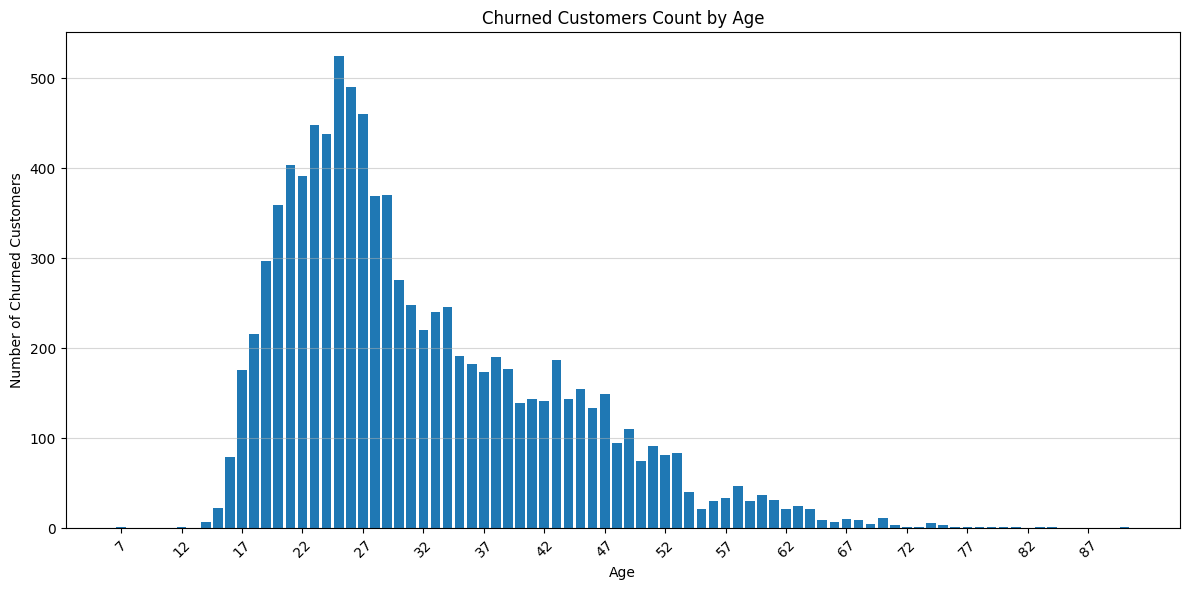

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V27.1.csv')

# Filter for churned customers
churned_data = dataset[dataset['IS_LOST'] == 1.0]

# Count churned customers by age
age_group_dist = churned_data['CERT_AGE'].value_counts().sort_index()

# Plot churned customer counts by age
plt.figure(figsize=(12, 6))
plt.bar(age_group_dist.index, age_group_dist.values, color='#1F78B4')  # Blue color for bars
plt.title('Churned Customers Count by Age')
plt.xlabel('Age')
plt.ylabel('Number of Churned Customers')

# Set X-axis ticks at intervals of 5 years
x_ticks = range(int(age_group_dist.index.min()), int(age_group_dist.index.max()) + 1, 5)
plt.xticks(x_ticks, rotation=45)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()  # Prevent label overlap
plt.show()


  ## Explanation:
####  It filters churned customers from the dataset and visualizes the distribution of their ages. It generates a bar chart showing the number of churned users across different age groups, with age intervals set every 5 years for clarity.

## 12. Churn Analysis by VIP Level


   MONTH_ID            USER_ID  INNET_MONTH  IS_AGREE  AGREE_EXP_DATE  \
0    201601  U3115092040504266           62         1        201609.0   
1    201601  U3115090138635105            5         1        201609.0   
2    201601  U3115062769878916          171         0             NaN   
3    201601  U3115061733263650            8         1        201606.0   
4    201601  U3115060569699130            8         0             NaN   

   CREDIT_LEVEL  VIP_LVL  ACCT_FEE  CALL_DURA  NO_ROAM_LOCAL_CALL_DURA  ...  \
0            65     99.0     84.95      36891                     2699  ...   
1            66      NaN    251.78      28858                      889  ...   
2            67     99.0     26.00      14838                    14812  ...   
3            66     99.0    139.30      11144                        0  ...   
4            67     99.0     31.95       5528                     5528  ...   

   CALLING_RING  CALLED_RING  CUST_SEX  CERT_AGE  CONSTELLATION_DESC  \
0            4

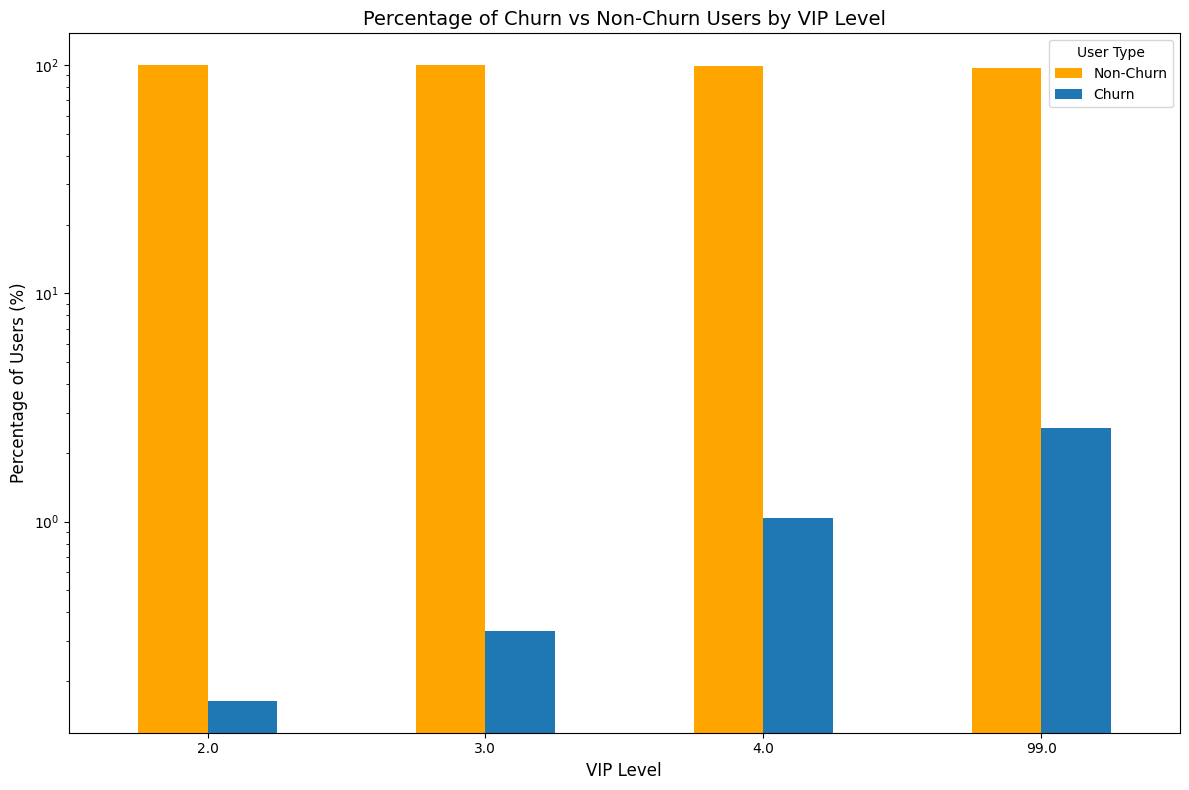

VIP Level Distribution by Churn Status (Percentage):
IS_LOST        0.0       1.0
VIP_LVL                     
2.0      99.836334  0.163666
3.0      99.669604  0.330396
4.0      98.963904  1.036096
99.0     97.439120  2.560880


In [5]:
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/Main Dataset.csv', encoding='latin1')



print(dataset.head())

# Group the data by VIP_LVL and IS_LOST (Churned vs Non-Churned)
vip_level_stats = dataset.groupby(['VIP_LVL', 'IS_LOST']).size().unstack().fillna(0)

# Calculate the percentage of churned and non-churned users for each VIP level
vip_level_percentage = vip_level_stats.div(vip_level_stats.sum(axis=1), axis=0) * 100

# Create a bar chart to display the percentage of users based on VIP_LVL and IS_LOST
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
vip_level_percentage.plot(kind='bar', stacked=False, ax=ax, color=['#FFA500', '#1F78B4'])  # Orange and Blue

# Set chart labels and title
ax.set_xlabel('VIP Level', fontsize=12)
ax.set_ylabel('Percentage of Users (%)', fontsize=12)
ax.set_title('Percentage of Churn vs Non-Churn Users by VIP Level', fontsize=14)

# Ensure x-axis labels are displayed correctly
ax.set_xticklabels(vip_level_percentage.index, rotation=0, fontsize=10)

# Set legend
ax.legend(['Non-Churn', 'Churn'], title='User Type')

# Apply logarithmic scale to y-axis (this allows smaller changes to be visible)
ax.set_yscale('log')  # Logarithmic scale for y-axis

# Display the chart
plt.tight_layout()
plt.show()

# Print the percentage statistics
print("VIP Level Distribution by Churn Status (Percentage):")
print(vip_level_percentage)


  ## Explanation:
#### This script analyzes user churn by VIP level, calculating the percentage of churned and non-churned users for each VIP level. It visualizes the results using a bar chart with a logarithmic scale to better highlight differences in churn rates across categories, providing insights into user retention patterns.